# Title : Fake News Detection


---
### Abstract : 

---
### Dataset : Dataset contains the detailed information about the particular news i.e. Source of News, Title, image url, etc.

---
#### Name :                 Enrollment Number : 
#### Name :                 Enrollment Number : 
#### Name :                 Enrollment Number : 
#### Name :                 Enrollment Number : 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#root_path = 'gdrive/My Drive/your_project_folder/'  #change dir to your project folder
root_path = '/content/drive/My Drive/Essential'


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-07-15 13:32:16--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-07-15 13:32:16--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-07-15 13:32:17--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
# Now just move the glove.6B.100d.txt file directly from local folder to your drive folder from table of content file.

In [ ]:
import keras
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
import numpy as np
import pandas 

import pandas as pd
from collections import defaultdict
import re


import sys
import os

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from keras.models import Model



#NlTK

from wordcloud import WordCloud,STOPWORDS
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


#For Model

from keras.layers import Input, Dense, Embedding, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.models import Model
from sklearn.model_selection import train_test_split

# Train Test Split
from sklearn.model_selection import train_test_split

MAX_SEQUENCE_LENGTH = 1000
MAX_NB_WORDS = 200000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2705695449053378754
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6575884794933238904
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4556872623791190397
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11150726272
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11552052665402783893
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Give path to file train.tsv from folder Essential
df = pd.read_csv("/content/drive/My Drive/Essential/train.tsv",sep='\t') # Here train.tsv is the same dataset just upload it to your respective google drive and copy the path here
df.head()

In [ ]:
df1=df.iloc[:,[5,7,8,10,12,13,17]]#['num_comments','score','upvote_ratio','clean_title','2_way_label'])
df1=df1.iloc[:,:]
df1.head()

,clean_title,domain,hasImage,image_url,num_comments,score,2_way_label
0,my walgreens offbrand mucinex was engraved wit...,i.imgur.com,True,https://external-preview.redd.it/WylDbZrnbvZdB...,2.0,12,1
1,NaN,NaN,True,http://i.imgur.com/yxrkYT8.jpg,NaN,5,0
2,this concerned sink with a tiny hat,i.redd.it,True,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,2.0,119,0
3,hackers leak emails from uae ambassador to us,aljazeera.com,True,https://external-preview.redd.it/6fNhdbc6K1vFA...,1.0,44,1
4,NaN,NaN,True,http://i.imgur.com/M8KTWMx.jpg,NaN,3,0


In [ ]:
df1.iloc[:,:-1]=df1.iloc[:,:-1].replace(to_replace = np.nan, value ='') 

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
df1.iloc[:,-1]=df1.iloc[:,-1].replace(to_replace = np.nan, value =0) 

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
texts = []
labels = []

for i in range(len(list(df1.clean_title))):
    text = str(df1['clean_title'][i])
    texts.append(text)
    labels.append(df1['2_way_label'][i])
    
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 147733 unique tokens.


In [ ]:
# Pad input sequences
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(labels,dtype='int32'),num_classes = 2)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (878218, 1000)
Shape of label tensor: (878218, 2)


In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Dense, Embedding, LSTM, GRU

In [ ]:
GLOVE_DIR = "" 
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, '/content/glove.6B.100d.txt'), encoding="utf8") #The file that you had downloaded and moved from local session to drive. 

In [ ]:
for line in f:
    values = line.split()
    #print(values[1:])
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove.' % len(embeddings_index))

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH)

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras import layers

embedding_vecor_length = 32
modell = Sequential()
modell.add(embedding_layer)
modell.add(Dropout(0.2))
modell.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
modell.add(MaxPooling1D(pool_size=2))
modell.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='sigmoid'))
modell.add(MaxPooling1D(pool_size=2))
modell.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
modell.add(MaxPooling1D(pool_size=2))
modell.add(LSTM(100,activation='relu',recurrent_activation='sigmoid',dropout=0.2, recurrent_dropout=0.2))
modell.add(BatchNormalization())
modell.add(Dense(1024, activation='relu'))
modell.add(layers.Dropout(0.2))
modell.add(Dense(512,  activation='relu'))
modell.add(layers.Dropout(0.2))
modell.add(Dense(256, activation='relu'))
modell.add(layers.Dropout(0.2))
modell.add(Dense(128, activation='relu'))
modell.add(layers.Dropout(0.2))
modell.add(Dense(64, activation='relu'))
modell.add(layers.Dropout(0.2))
modell.add(Dense(2, activation='softmax'))

modell.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modell.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 100)         14773400  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 32)          9632      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 500, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 64)           8256      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 64)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 250, 128)         

In [ ]:
#give path MPFolder save your model in MPFolder
filepath = "/content/drive/My Drive/MPFolder/model.h5" # Location to save yor model
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
modell.fit(data, labels,validation_split=0.05, epochs=9, batch_size=1024 , callbacks=callbacks_list)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 834307 samples, validate on 43911 samples
Epoch 1/9
834307/834307 [==============================] - 557s 668us/step - loss: 0.4168 - accuracy: 0.8049 - val_loss: 0.4201 - val_accuracy: 0.8046

Epoch 00001: loss improved from inf to 0.41680, saving model to /content/drive/My Drive/hackerthon1/model.h5
Epoch 2/9
834307/834307 [==============================] - 549s 658us/step - loss: 0.3464 - accuracy: 0.8504 - val_loss: 0.3342 - val_accuracy: 0.8553

Epoch 00002: loss improved from 0.41680 to 0.34641, saving model to /content/drive/My Drive/hackerthon1/model.h5
Epoch 3/9
834307/834307 [==============================] - 545s 653us/step - loss: 0.3189 - accuracy: 0.8647 - val_loss: 0.3408 - val_accuracy: 0.8553

Epoch 00003: loss improved from 0.34641 to 0.31891, saving model to /content/drive/My Drive/hackerthon1/model.h5
Epoch 4/9
834307/834307 [==============================] - 546s 654us/step - loss: 0.2979 - accuracy: 0.8750 - val_loss: 0.3530 - val_accuracy: 0.8507

Epoch 

In [ ]:
import os

base_dir = 'MPFolder'
os.mkdir(base_dir)

In [ ]:
base_dir = 'LPFolder'
os.mkdir(base_dir)

In [ ]:
from keras.models import load_model
filepath = "/content/drive/My Drive/MPFolder/model.h5"  # Location to get yor model
filepath1 = "/content/drive/My Drive/MPFolder/hackerthon1.h5" # Location to save yor model
checkpoint = ModelCheckpoint(filepath1, monitor='loss', verbose=1, save_best_only=True, mode='min')

new_model = load_model(filepath)
#checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
#new_model.fit(x_train, y_train, epochs=5, batch_size=50, callbacks=callbacks_list)


new_model.fit(data, labels,validation_split=0.05, epochs=9, batch_size=1024 , callbacks=callbacks_list)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 834307 samples, validate on 43911 samples
Epoch 1/9
834307/834307 [==============================] - 555s 665us/step - loss: 0.2193 - accuracy: 0.9110 - val_loss: 0.3595 - val_accuracy: 0.8553

Epoch 00001: loss improved from inf to 0.21929, saving model to /content/drive/My Drive/hackerthon1/hackerthon1.h5
Epoch 2/9
834307/834307 [==============================] - 553s 662us/step - loss: 0.2118 - accuracy: 0.9140 - val_loss: 0.3684 - val_accuracy: 0.8577

Epoch 00002: loss improved from 0.21929 to 0.21180, saving model to /content/drive/My Drive/hackerthon1/hackerthon1.h5
Epoch 3/9
834307/834307 [==============================] - 551s 660us/step - loss: 0.2033 - accuracy: 0.9178 - val_loss: 0.3772 - val_accuracy: 0.8561

Epoch 00003: loss improved from 0.21180 to 0.20330, saving model to /content/drive/My Drive/hackerthon1/hackerthon1.h5
Epoch 4/9
834307/834307 [==============================] - 550s 659us/step - loss: 0.1960 - accuracy: 0.9212 - val_loss: 0.3919 - val_accura

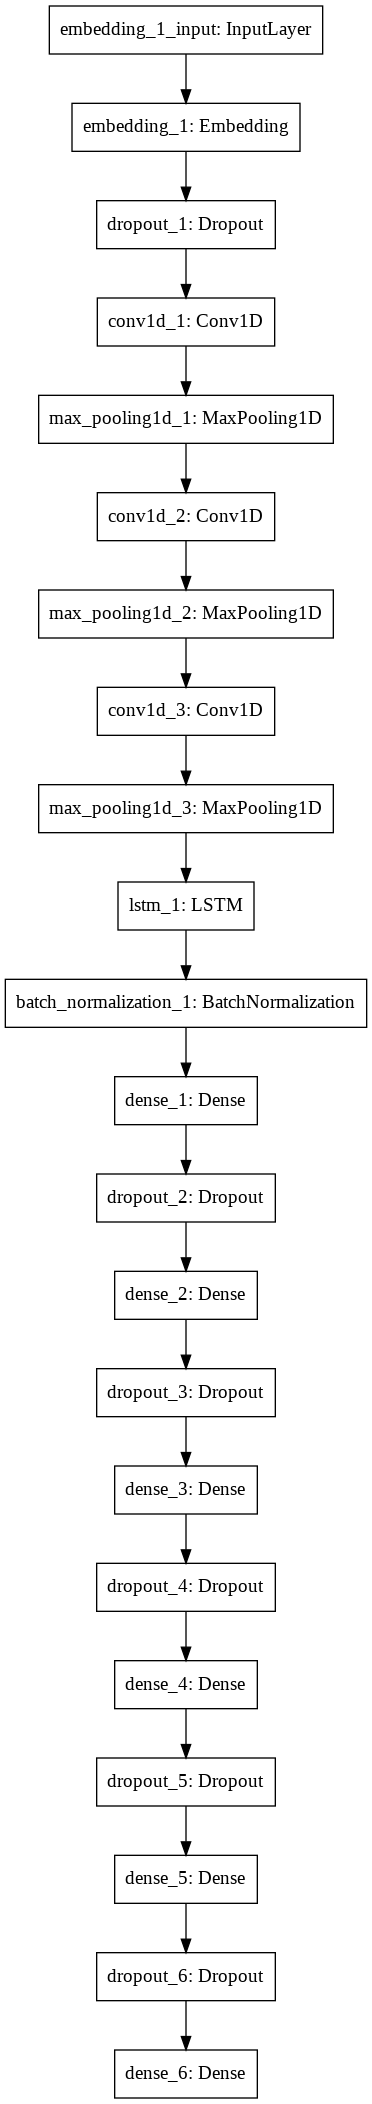

In [ ]:
from keras.utils import plot_model
plot_model(new_model, to_file='new_model.png')

# Prediction On Validation Data 

In [ ]:
#Give Path to MPFolder's hackerthon1.h5 file
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/MPFolder/hackerthon1.h5')

In [ ]:
#Give Path to Essential Folder's validate.tsv file
import pandas as pd
tmps = pd.read_csv('/content/drive/My Drive/Essential/validate.tsv',sep='\t')
tmps.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,0,0,71235.0,316517.0,xprmntng,NaN,1.499964e+09,NaN,True,dk69gv8,https://i.imgur.com/snZdHrF.jpg,6n1oet,NaN,505,psbattle_artwork,NaN,NaN,0,2,4
1,1,1,NaN,NaN,singingdart7854,my xbox controller says hi,1.567436e+09,i.redd.it,True,cypw96,https://preview.redd.it/l0ga0tug17k31.jpg?widt...,NaN,4.0,25,mildlyinteresting,My Xbox controller says hi,0.72,1,0,0
2,2,2,NaN,NaN,mandal0re,new image from the mandalorian,1.567745e+09,i.imgur.com,True,d0bzlq,https://external-preview.redd.it/VX7bXDu9Gl8UZ...,NaN,5.0,21,photoshopbattles,PsBattle: New image from The Mandalorian,0.92,1,0,0
3,3,3,126554.0,582609.0,HE_WHO_DRUELS,say hello to my little friend,1.461468e+09,NaN,True,d2ezoob,http://i.imgur.com/F1Zbl3D.jpg,4g6bp9,NaN,10,psbattle_artwork,Say hello to my little friend!,NaN,0,2,4
4,4,4,228704.0,1014196.0,eNaRDe,watch your step little one,1.408047e+09,NaN,True,cjqctpw,http://i.imgur.com/KRyMjn1.jpg,2diyh3,NaN,1,psbattle_artwork,Watch your step little one,NaN,0,2,4


In [ ]:
df1.columns

Index(['clean_title', 'domain', 'hasImage', 'image_url', 'num_comments',
       'score', '2_way_label'],
      dtype='object')

In [ ]:
tmps = tmps.loc[:,['clean_title', 'domain', 'hasImage', 'image_url', 'num_comments','score', '2_way_label']]
tmps

,clean_title,domain,hasImage,image_url,num_comments,score,2_way_label
0,NaN,NaN,True,https://i.imgur.com/snZdHrF.jpg,NaN,505,0
1,my xbox controller says hi,i.redd.it,True,https://preview.redd.it/l0ga0tug17k31.jpg?widt...,4.0,25,1
2,new image from the mandalorian,i.imgur.com,True,https://external-preview.redd.it/VX7bXDu9Gl8UZ...,5.0,21,1
3,say hello to my little friend,NaN,True,http://i.imgur.com/F1Zbl3D.jpg,NaN,10,0
4,watch your step little one,NaN,True,http://i.imgur.com/KRyMjn1.jpg,NaN,1,0
...,...,...,...,...,...,...,...
92439,nicaraguan bank sanctioned by us shuts down,dailyjournal.net,True,https://external-preview.redd.it/rRJn2A584GGhv...,0.0,2,1
92440,this column and emergency light,i.redd.it,True,https://preview.redd.it/be71j19dltoz.jpg?width...,0.0,7,0
92441,former royal marine selling medals to help fun...,theroyalmarinescharity.org.uk,False,NaN,0.0,5,1
92442,so proud,NaN,True,http://i.imgur.com/6OGdxDB.jpg,NaN,10,0


In [ ]:
tmps.iloc[:,:-1]=tmps.iloc[:,:-1].replace(to_replace = np.nan, value ='') 

In [ ]:
tmps.iloc[:,-1]=tmps.iloc[:,-1].replace(to_replace = np.nan, value =0) 

In [ ]:
texts = []
labels = []

for i in range(len(list(tmps.clean_title))):
    text = str(tmps['clean_title'][i])
    texts.append(text)
    labels.append(tmps['2_way_label'][i])
    
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 45787 unique tokens.


In [ ]:
# Pad input sequences
datatmp = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(labels,dtype='int32'),num_classes = 2)
print('Shape of data tensor:', datatmp.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (92444, 1000)
Shape of label tensor: (92444, 2, 2)


In [ ]:
pred = model.predict(datatmp)

In [ ]:
result = pd.DataFrame(data = (datatmp,pred))
result

,0
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0.99667907, 0.003320982], [0.67368805, 0.326..."


In [ ]:
dpred = pd.DataFrame(data = (pred))
dpred
dpred.columns = ['False','True']
dpred.columns

Index(['False', 'True'], dtype='object')

In [ ]:
# dpred['Fake'] = dpred[dpred['False'] >= 0.7]['False']
# dpred['Real'] = dpred[dpred['True'] >= 0.7]['True']
# dpred

,False,True,Fake,Real
0,0.996679,0.003321,0.996679,NaN
1,0.673688,0.326312,NaN,NaN
2,0.805141,0.194859,0.805141,NaN
3,0.192483,0.807517,NaN,0.807517
4,0.975551,0.024448,0.975551,NaN
...,...,...,...,...
92439,0.934787,0.065213,0.934787,NaN
92440,0.229644,0.770357,NaN,0.770357
92441,0.032652,0.967348,NaN,0.967348
92442,0.929973,0.070027,0.929973,NaN


In [ ]:
dpred['IsFake'] = dpred['False'] > 0.7
dpred
# dpred['Prediction'] = dpred['IsFake'].astype(int32)

,False,True,IsFake
0,0.996679,0.003321,True
1,0.673688,0.326312,False
2,0.805141,0.194859,True
3,0.192483,0.807517,False
4,0.975551,0.024448,True
...,...,...,...
92439,0.934787,0.065213,True
92440,0.229644,0.770357,False
92441,0.032652,0.967348,False
92442,0.929973,0.070027,True


# Prediction On Test Date

In [ ]:
# from tensorflow import keras
# model = keras.models.load_model('/content/drive/My Drive/MPFolder/hackerthon1.h5')

In [ ]:
#Give Path to Essential Folder's test_public.tsv file
import pandas as pd
tmps = pd.read_csv('/content/drive/My Drive/Essential/test_public.tsv',sep='\t')
tmps.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,0,0,NaN,NaN,buzzly6,virginia first lady criticized for handing cot...,1.551316e+09,philly.com,False,avkxum,NaN,NaN,2.0,16,nottheonion,Virginia first lady criticized for handing cot...,0.69,1,0,0
1,1,1,NaN,NaN,NaN,jason falconer reluctant hero stopped mall att...,1.474326e+09,cnn.it,False,53kdz3,NaN,NaN,0.0,7,upliftingnews,Jason Falconer: Reluctant hero stopped mall at...,0.77,1,0,0
2,2,2,75691.0,335711.0,myternity,NaN,1.497067e+09,NaN,True,diperbi,http://i.imgur.com/cSIuEVF.jpg,6gc83w,NaN,3,psbattle_artwork,NaN,NaN,0,2,4
3,3,3,NaN,NaN,NaN,woman bites camels testicles to save herself a...,1.569178e+09,wbrz.com,False,d7upss,NaN,NaN,3.0,7,nottheonion,Woman bites camel’s testicles to save herself ...,1.00,1,0,0
4,4,4,190207.0,862707.0,trustbytrust,stargazer,1.425139e+09,NaN,True,cozywbv,http://i.imgur.com/BruWKDi.jpg,2xct9d,NaN,3,psbattle_artwork,stargazer,NaN,0,2,4


In [ ]:
df1.columns

Index(['clean_title', 'domain', 'hasImage', 'image_url', 'num_comments',
       'score', '2_way_label'],
      dtype='object')

In [ ]:
tmps = tmps.loc[:,['clean_title', 'domain', 'hasImage', 'image_url', 'num_comments','score', '2_way_label']]
tmps

,clean_title,domain,hasImage,image_url,num_comments,score,2_way_label
0,virginia first lady criticized for handing cot...,philly.com,False,NaN,2.0,16,1
1,jason falconer reluctant hero stopped mall att...,cnn.it,False,NaN,0.0,7,1
2,NaN,NaN,True,http://i.imgur.com/cSIuEVF.jpg,NaN,3,0
3,woman bites camels testicles to save herself a...,wbrz.com,False,NaN,3.0,7,1
4,stargazer,NaN,True,http://i.imgur.com/BruWKDi.jpg,NaN,3,0
...,...,...,...,...,...,...,...
92439,deep down he always wanted to be a ballet dancer,NaN,True,http://i.imgur.com/otCWbOt.jpg,NaN,141,0
92440,man surgically implants train ticket in hand p...,mobile.abc.net.au,False,NaN,1.0,2,1
92441,NaN,NaN,True,https://i.redd.it/zgdhtjritfx01%2ejpg,NaN,1,0
92442,walrus sinks russian navy boat in the arctic o...,cnn.com,False,NaN,1.0,2,1


In [ ]:
tmps.iloc[:,:-1]=tmps.iloc[:,:-1].replace(to_replace = np.nan, value ='') 

In [ ]:
tmps.iloc[:,-1]=tmps.iloc[:,-1].replace(to_replace = np.nan, value =0) 

In [ ]:
texts = []
labels = []

for i in range(len(list(tmps.clean_title))):
    text = str(tmps['clean_title'][i])
    texts.append(text)
    labels.append(tmps['2_way_label'][i])
    
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 45462 unique tokens.


In [ ]:
# Pad input sequences
datatmp = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(labels,dtype='int32'),num_classes = 2)
print('Shape of data tensor:', datatmp.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (92444, 1000)
Shape of label tensor: (92444, 2)


In [ ]:
pred = model.predict(datatmp)

In [ ]:
result = pd.DataFrame(data = (datatmp,pred))
result

,0
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0.77488804, 0.22511199], [0.99995923, 4.0763..."


In [ ]:
dpred = pd.DataFrame(data = (pred))
dpred
dpred.columns = ['False','True']
dpred.columns

Index(['False', 'True'], dtype='object')

In [ ]:
# dpred['Fake'] = dpred[dpred['False'] >= 0.7]['False']
# dpred['Real'] = dpred[dpred['True'] >= 0.7]['True']
# dpred

In [ ]:
dpred['IsFake'] = dpred['False'] > 0.7
dpred
# dpred['Prediction'] = dpred['IsFake'].astype(int32)

,False,True,IsFake
0,0.774888,0.225112,True
1,0.999959,0.000041,True
2,0.996679,0.003321,True
3,0.997369,0.002631,True
4,0.999803,0.000197,True
...,...,...,...
92439,0.368682,0.631318,False
92440,0.102969,0.897031,False
92441,0.996679,0.003321,True
92442,0.012253,0.987746,False


In [ ]:
ls = tmps['clean_title'][92443]

In [ ]:
ls

'toddler miraculously survives story fall landing on car'

In [ ]:
dpred['Prediction'] = ""
for i in range(len(dpred)):
  if(dpred['IsFake'][i]==False):
    dpred['Prediction'][i]="Real"
  else:
    dpred['Prediction'][i]="Fake"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
dpred

,False,True,IsFake,Prediction
0,0.774888,0.225112,True,Fake
1,0.999959,0.000041,True,Fake
2,0.996679,0.003321,True,Fake
3,0.997369,0.002631,True,Fake
4,0.999803,0.000197,True,Fake
...,...,...,...,...
92439,0.368682,0.631318,False,Real
92440,0.102969,0.897031,False,Real
92441,0.996679,0.003321,True,Fake
92442,0.012253,0.987746,False,Real


# Testing

###We have tried hand picked data by various websites and add it to Testing csv file and get prediction of model. 

In [ ]:
# from tensorflow import keras
# model = keras.models.load_model('/content/drive/My Drive/hackerthon1/hackerthon1.h5')

In [ ]:
#Give Path to Essential Folder's Testtttting - Testtttting.csv file
import pandas as pd
tmps = pd.read_csv('/content/drive/My Drive/Essential/Testtttting - Testtttting.csv',sep=',')
tmps.head()

,clean_title,domain,hasImage,image_url,num_comments,score
0,India has second largest population in the world,https://www.worldatlas.com/,True,"https://srcnaut.com/cdn-cgi/image/f=auto,w=960...",500,700


In [ ]:
tmps = {
    'clean_title' : ["President-elect Donald J. Trump takes the oath of office as the 45th President of the United States in Washington, Jan. 20, 2017."],
    'domain': ["https://abcnews.go.com/"],
    'hasImage': ["TRUE"],
    'image_url': ["https://s.abcnews.com/images/Politics/GTY-donald-trump-oath-1-jt-170120_16x9_992.jpg"],
    'num_comments': [19],
    'score' : [100],
  }
tmps = pd.DataFrame(data=tmps)

In [ ]:
tmps

,clean_title,domain,hasImage,image_url,num_comments,score
0,President-elect Donald J. Trump takes the oath...,https://abcnews.go.com/,TRUE,https://s.abcnews.com/images/Politics/GTY-dona...,19,100


In [ ]:
df1.columns

Index(['clean_title', 'domain', 'hasImage', 'image_url', 'num_comments',
       'score', '2_way_label'],
      dtype='object')

In [ ]:
# tmps = tmps.loc[:,['clean_title', 'domain', 'hasImage', 'image_url', 'num_comments','score', '2_way_label']]
# tmps

In [ ]:
tmps.iloc[:,:-1]=tmps.iloc[:,:-1].replace(to_replace = np.nan, value ='') 

In [ ]:
tmps.iloc[:,-1]=tmps.iloc[:,-1].replace(to_replace = np.nan, value =0) 

In [ ]:
texts = []
labels = []

for i in range(len(list(tmps.clean_title))):
    text = str(tmps['clean_title'][i])
    texts.append(text)
    # labels.append(tmps['2_way_label'][i])
    
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 19 unique tokens.


In [ ]:
# Pad input sequences
datatmp = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(labels,dtype='int32'),num_classes = 2)
print('Shape of data tensor:', datatmp.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (1, 1000)
Shape of label tensor: (0, 2)


In [ ]:
pred = model.predict(datatmp)

In [ ]:
result = pd.DataFrame(data = (datatmp,pred))
result

,0
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0.49672833, 0.50327164]]"


In [ ]:
dpred = pd.DataFrame(data = (pred))
dpred
dpred.columns = ['False','True']
dpred.columns

Index(['False', 'True'], dtype='object')

In [ ]:
dpred['IsFake'] = dpred['False'] > 0.7
# dpred.columns = ['False','True','IsFake','Prediction']
dpred['Prediction'] = ""
for i in range(len(dpred)):
  if(dpred['IsFake'][i]==False):
    dpred['Prediction'][i]="Real"
  else:
    dpred['Prediction'][i]="Fake"
# dpred['Prediction'] = dpred['IsFake'].astype(int32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dpred

,False,True,IsFake,Prediction
0,0.496728,0.503272,False,Real
